# Project 1: Predicting Tourism Trends

To utilize machine learning algorithms on historical tourism data, including climate, season, and economic indicators, to predict future tourism trends in India and optimize tourism management.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk
from tkinter import ttk

# Data Preprocessing

In [55]:
df = pd.read_csv("C:/Users/mahia/Downloads/tourism.csv")
display(df.head())

,State,Month,Year,FTAs,DTAs,Events,Weather,Traffic_Level
0,Andhra Pradesh,January,2024,39166,42714,NaN,Cool,Medium
1,Andhra Pradesh,February,2024,22659,73890,NaN,Cool,Medium
2,Andhra Pradesh,March,2024,8936,78361,NaN,Warm,Medium
3,Andhra Pradesh,April,2024,40940,132002,NaN,Warm,High
4,Andhra Pradesh,May,2024,40414,64266,NaN,Warm,High


In [56]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['State', 'Month', 'Year', 'FTAs', 'DTAs', 'Events', 'Weather',
       'Traffic_Level'],
      dtype='object')


# Feature Engineering

In [57]:
df['Weather'] = LabelEncoder().fit_transform(df['Weather'])
df['Traffic_Level'] = LabelEncoder().fit_transform(df['Traffic_Level'])

features = df[['FTAs', 'DTAs', 'Weather']]
target = df['Traffic_Level']


# Data Visualization

C:\Users\mahia\AppData\Local\Temp\ipykernel_6824\592146868.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='FTAs', data=df, estimator=sum, ci=None)
C:\Users\mahia\AppData\Local\Temp\ipykernel_6824\592146868.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='DTAs', data=df, estimator=sum, ci=None)


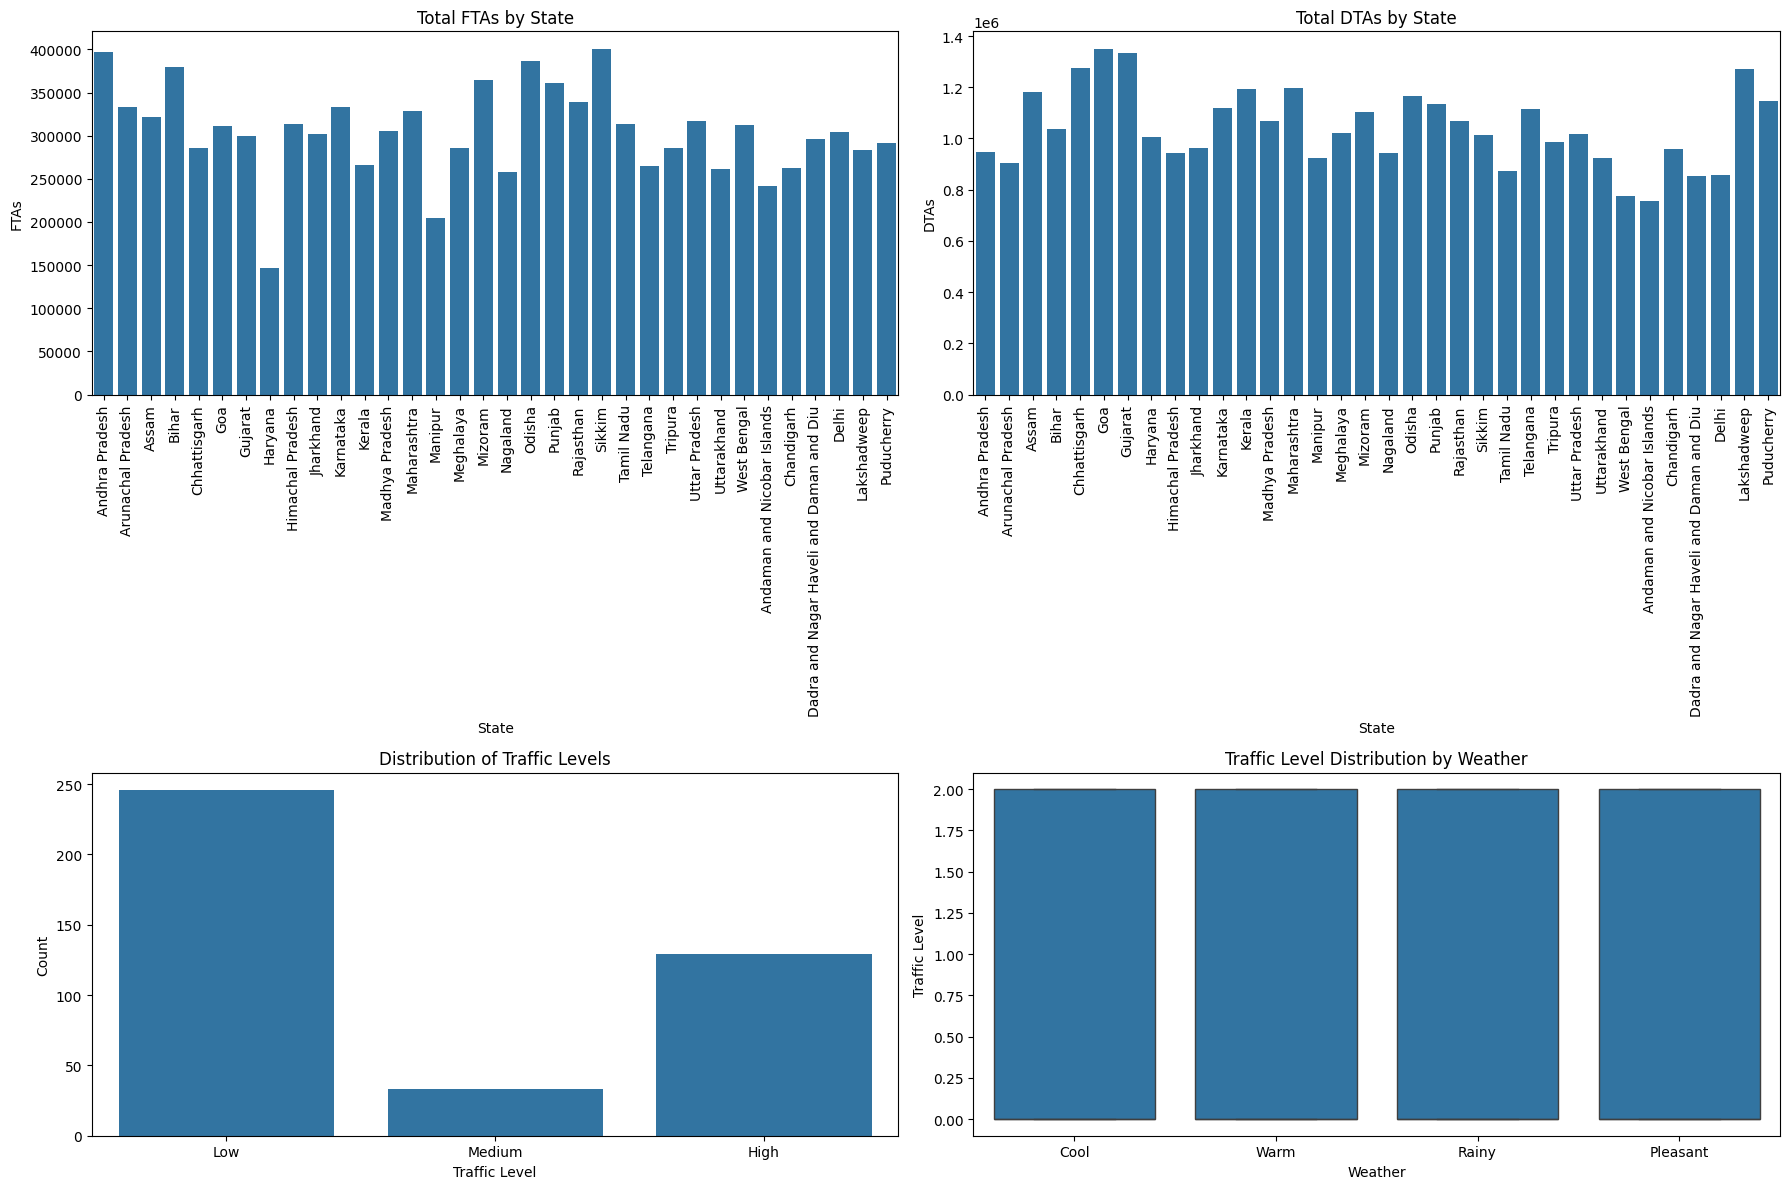

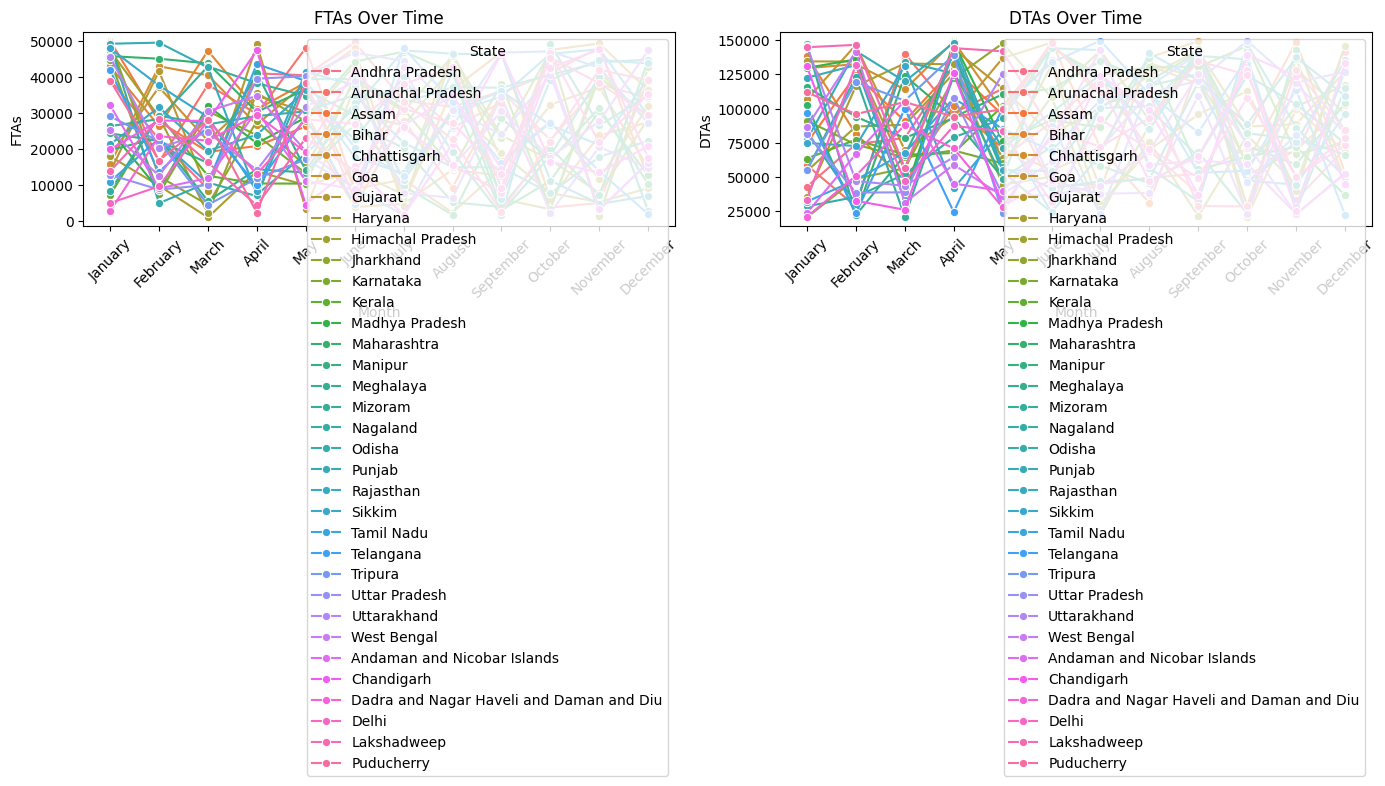

In [58]:
plt.figure(figsize=(18, 12))

# Plot FTAs by State
plt.subplot(2, 2, 1)
sns.barplot(x='State', y='FTAs', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Total FTAs by State')

# Plot DTAs by State
plt.subplot(2, 2, 2)
sns.barplot(x='State', y='DTAs', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Total DTAs by State')

# Traffic Level Distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Traffic_Level', data=df)
plt.title('Distribution of Traffic Levels')
plt.xlabel('Traffic Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])

# Weather vs Traffic Level
plt.subplot(2, 2, 4)
sns.boxplot(x='Weather', y='Traffic_Level', data=df)
plt.title('Traffic Level Distribution by Weather')
plt.xlabel('Weather')
plt.ylabel('Traffic Level')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cool', 'Warm', 'Rainy', 'Pleasant'])

plt.tight_layout()
plt.show()

# FTAs and DTAs Over Time
plt.figure(figsize=(14, 6))

# FTAs Over Time
plt.subplot(1, 2, 1)
sns.lineplot(x='Month', y='FTAs', hue='State', data=df, marker='o')
plt.title('FTAs Over Time')
plt.xlabel('Month')
plt.ylabel('FTAs')
plt.xticks(rotation=45)

# DTAs Over Time
plt.subplot(1, 2, 2)
sns.lineplot(x='Month', y='DTAs', hue='State', data=df, marker='o')
plt.title('DTAs Over Time')
plt.xlabel('Month')
plt.ylabel('DTAs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Model Training

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [60]:
# Model 1: Linear Regression for Regression Analysis
regression_model = LinearRegression()
regression_model.fit(X_train[['FTAs', 'DTAs', 'Weather']], y_train)

LinearRegression()

In [61]:
# Model 2: Random Forest Classifier for Classification Analysis
classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [62]:
# Evaluate Regression Model
y_pred_regression = regression_model.predict(X_test[['FTAs', 'DTAs', 'Weather']])
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)
print(f"Linear Regression - Mean Squared Error (MSE): {mse:.2f}")
print(f"Linear Regression - R^2 Score: {r2:.2f}")

Linear Regression - Mean Squared Error (MSE): 0.38
Linear Regression - R^2 Score: 0.55


In [63]:
# Evaluate Classification Model
y_pred_classification = classification_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_classification)
print(f"Random Forest Classifier - Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_classification, target_names=['Low', 'Medium', 'High']))

Random Forest Classifier - Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

         Low       0.96      1.00      0.98        43
      Medium       0.89      0.80      0.84        10
        High       0.93      0.90      0.91        29

    accuracy                           0.94        82
   macro avg       0.92      0.90      0.91        82
weighted avg       0.94      0.94      0.94        82



In [67]:
# example
future_data = pd.DataFrame({
    'FTAs': [50000],
    'DTAs': [80000],
    'Weather': [LabelEncoder().fit(['Cool', 'Warm', 'Rainy', 'Pleasant']).transform(['Warm'])[0]]
})
future_prediction = model.predict(future_data)
traffic_level = LabelEncoder().fit(df['Traffic_Level']).inverse_transform(np.round(future_prediction).astype(int))

print(f"Predicted Traffic Level: {traffic_level[0]}")

# easy terms
traffic_levels = {0: 'Low', 1: 'Medium', 2: 'High'}
print(f"Predicted Traffic Level: {traffic_levels[int(np.round(future_prediction))]}")

Predicted Traffic Level: 1
Predicted Traffic Level: Medium


C:\Users\mahia\AppData\Local\Temp\ipykernel_6824\4184029224.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Traffic Level: {traffic_levels[int(np.round(future_prediction))]}")


In [69]:
# Define a function to make predictions
def predict_traffic():
    try:
        # Retrieve input data
        FTAs = float(entry_FTAs.get())
        DTAs = float(entry_DTAs.get())
        weather = weather_combobox.get()

        # Convert weather to numeric
        weather_label = LabelEncoder().fit(['Cool', 'Warm', 'Rainy', 'Pleasant']).transform([weather])[0]

        # Prepare the data for prediction
        future_data = pd.DataFrame({
            'FTAs': [FTAs],
            'DTAs': [DTAs],
            'Weather': [weather_label]
        })

        # Make prediction using the Random Forest Classifier model
        future_prediction = classification_model.predict(future_data)
        
        # Map prediction back to traffic level
        traffic_level = {0: 'Low', 1: 'Medium', 2: 'High'}
        predicted_traffic = traffic_level[int(future_prediction[0])]

        # Display the result
        result_label.config(text=f"Predicted Traffic Level: {predicted_traffic}")
    except Exception as e:
        result_label.config(text=f"Error: {str(e)}")

# Set up the GUI window
root = tk.Tk()
root.title("Tourism Trends Prediction")

# Create and place widgets (labels, inputs, and buttons)
tk.Label(root, text="FTAs:").grid(row=0, column=0, padx=10, pady=10)
entry_FTAs = tk.Entry(root)
entry_FTAs.grid(row=0, column=1, padx=10, pady=10)

tk.Label(root, text="DTAs:").grid(row=1, column=0, padx=10, pady=10)
entry_DTAs = tk.Entry(root)
entry_DTAs.grid(row=1, column=1, padx=10, pady=10)

tk.Label(root, text="Weather:").grid(row=2, column=0, padx=10, pady=10)
weather_combobox = ttk.Combobox(root, values=["Cool", "Warm", "Rainy", "Pleasant"])
weather_combobox.grid(row=2, column=1, padx=10, pady=10)

predict_button = tk.Button(root, text="Predict", command=predict_traffic)
predict_button.grid(row=3, column=0, columnspan=2, pady=20)

result_label = tk.Label(root, text="Predicted Traffic Level: ", font=('Helvetica', 12, 'bold'))
result_label.grid(row=4, column=0, columnspan=2, pady=10)

# Start the GUI loop
root.mainloop()